In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time
import seaborn as sns
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TennisML_0.22.csv',index_col=0)
df = df.replace([np.inf, -np.inf], np.nan)
with pd.option_context('mode.use_inf_as_null', True):
    df = df.dropna(subset=df.columns.difference(['p1_odd','p2_odd']), how='any')
df.drop(['match_id','p1_id','p2_id','p_1_rel_surf', 'p_1_rel_ind','p_2_rel_surf', 'p_2_rel_ind'],axis=1,inplace=True)
display(df)
print(df.columns)

,date,label,p1_odd,p2_odd,h2h,h2h_p,p_1_tour_suc,p_2_tour_suc,p_1_tour_suc_per,p_2_tour_suc_per,...,p_2_avg_bpf_game,p_2_avg_svp_game,p_2_avg_r_ip_w,p_2_avg_pwon_r_game,p_2_avg_bp_game,p_2_avg_r_game_w,p_2_avg_gm_w,p_2_avg_g_dominance,p_2_avg_br_ratio,p_2_avg_win_p
0,1990-12-31,0,NaN,NaN,0,0.000000,1,1,1.000000,1.000000,...,0.062857,0.968571,0.387650,2.379692,0.820462,0.206769,0.590222,0.355385,0.361905,0.657614
1,1990-12-31,1,NaN,NaN,0,0.000000,1,1,1.000000,1.000000,...,0.261500,0.844000,0.556059,3.376000,1.000000,0.500000,0.672000,1.950000,0.585000,0.514321
2,1990-12-31,1,NaN,NaN,0,0.000000,1,1,1.000000,1.000000,...,0.851111,0.840000,0.519741,2.576222,0.610000,0.458667,0.639298,3.248000,4.856889,0.628589
3,1990-12-31,1,NaN,NaN,0,0.000000,1,1,1.000000,1.000000,...,0.159029,0.953486,0.416033,2.613938,0.786627,0.259058,0.610900,1.254978,1.015619,0.637729
4,1990-12-31,1,NaN,NaN,0,0.000000,1,1,1.000000,1.000000,...,0.616000,0.752000,0.456667,2.464857,0.721429,0.344571,0.556059,1.407643,1.196667,0.281949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84414,2021-11-07,0,5.00,1.16,0,0.000000,1,1,1.000000,0.000000,...,0.514654,0.824977,0.387088,2.078494,0.508900,0.177076,0.497519,1.052200,1.357086,0.437453
84415,2021-11-07,1,2.50,1.53,0,0.000000,1,1,0.000000,0.500000,...,0.480996,0.758484,0.433515,2.618979,0.562970,0.293633,0.524004,0.746031,0.995261,0.488511
84416,2021-11-07,1,NaN,NaN,1,0.666667,1,1,0.500000,0.714286,...,0.379015,0.826861,0.401802,2.119391,0.575703,0.220303,0.520682,0.472382,1.009583,0.479825
84417,2021-11-07,0,1.61,2.30,0,0.000000,1,1,0.888889,1.000000,...,0.397598,0.825506,0.458163,2.745837,0.672990,0.281594,0.555240,1.930559,0.941370,0.376046


Index(['date', 'label', 'p1_odd', 'p2_odd', 'h2h', 'h2h_p', 'p_1_tour_suc',
       'p_2_tour_suc', 'p_1_tour_suc_per', 'p_2_tour_suc_per', 'p_1_rank',
       'p_1_elo_dif', 'p_1_avg_ace', 'p_1_avg_df', 'p_1_avg_tt_p',
       'p_1_avg_sv_w', 'p_1_avg_1st_w', 'p_1_avg_2nd_w', 'p_1_avg_bp_save',
       'p_1_avg_r_1st_w', 'p_1_avg_bp_w', 'p_1_avg_rp_w',
       'p_1_avg_p_dominance', 'p_1_avg_ace_game', 'p_1_avg_df_game',
       'p_1_avg_df_2nd_sv', 'p_1_avg_ace_df_ratio', 'p_1_avg_1st_sv_eff',
       'p_1_avg_sv_ip_w', 'p_1_avg_ploss_game', 'p_1_avg_bpf_game',
       'p_1_avg_svp_game', 'p_1_avg_r_ip_w', 'p_1_avg_pwon_r_game',
       'p_1_avg_bp_game', 'p_1_avg_r_game_w', 'p_1_avg_gm_w',
       'p_1_avg_g_dominance', 'p_1_avg_br_ratio', 'p_1_avg_win_p', 'p_2_rank',
       'p_2_elo_dif', 'p_2_avg_ace', 'p_2_avg_df', 'p_2_avg_tt_p',
       'p_2_avg_sv_w', 'p_2_avg_1st_w', 'p_2_avg_2nd_w', 'p_2_avg_bp_save',
       'p_2_avg_r_1st_w', 'p_2_avg_bp_w', 'p_2_avg_rp_w',
       'p_2_avg_p_dominance

In [ ]:
date='2018-1-1'
odd_dataset=df[df['p1_odd'].notna()]
X_val=odd_dataset.loc[(odd_dataset['date'] < date),~odd_dataset.columns.isin(['label'])].iloc[::10]
y_val=odd_dataset.loc[odd_dataset.index.isin(X_val.index),'label']
X_test=odd_dataset.loc[(odd_dataset['date'] > date),~odd_dataset.columns.isin(['label'])]
print(X_test['date'])
y_test=odd_dataset.loc[odd_dataset.index.isin(X_test.index),'label']
odds_test=X_test[['p1_odd', 'p2_odd']].copy()
odds_val=X_val[['p1_odd','p2_odd']].copy()
X_test=X_test.drop(['p1_odd', 'p2_odd','date'], axis=1)
X_val=X_val.drop(['p1_odd', 'p2_odd','date'], axis=1)
X_train=df.loc[(~df.index.isin(X_val.index)) & (~df.index.isin(X_test.index)),~df.columns.isin(['label', 'p1_odd','p2_odd'])]
X_train=X_train.drop('date', axis=1)
Y_train=df.loc[(~df.index.isin(X_val.index)) & (~df.index.isin(X_test.index)),'label']

print(X_train.shape,Y_train.shape)
print(X_val.shape,y_val.shape,odds_val.shape)
print(X_test.shape,y_test.shape,odds_test.shape)

77809    2018-10-01
77810    2018-10-01
77811    2018-10-01
77812    2018-10-01
77813    2018-10-01
            ...    
84413    2021-11-07
84414    2021-11-07
84415    2021-11-07
84417    2021-11-07
84418    2021-11-07
Name: date, Length: 2914, dtype: object
(75390, 66) (75390,)
(1862, 66) (1862,) (1862, 2)
(2914, 66) (2914,) (2914, 2)


In [ ]:
scaler = StandardScaler()
p_1_columns=[i for i in df.columns if 'p_1' in i]
p_2_columns=[i for i in df.columns if 'p_2' in i]
X_train[p_1_columns]= scaler.fit_transform(X_train[p_1_columns].to_numpy())
X_train[p_2_columns]= scaler.transform(X_train[p_2_columns].to_numpy())
X_val[p_1_columns]=scaler.transform(X_val[p_1_columns].to_numpy())
X_val[p_2_columns]=scaler.transform(X_val[p_2_columns].to_numpy())
X_test[p_1_columns] = scaler.transform(X_test[p_1_columns].to_numpy())
X_test[p_2_columns] = scaler.transform(X_test[p_2_columns].to_numpy())

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.0005

In [ ]:
class TestData(Dataset):
    
    def __init__(self, X_data,y_data,z_data):
        self.X_data = X_data
        self.y_data = y_data
        self.z_data= z_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index],self.z_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [ ]:
test_data = TestData(torch.FloatTensor(X_test.values),torch.FloatTensor(y_test.values),torch.FloatTensor(odds_test.values))
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(X_train.shape[1], 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout2(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
def compute_expectation(y_pred,odds):
    return y_pred*odds

In [ ]:
def get_roi(y_pred,odds,outcome,stake=1,threshold=1):
  bets_return=[]
  profit=0
  p1_pred=torch.sigmoid(y_pred)
  p2_pred=(1-p1_pred)
  p1_odd,p2_odd=odds[:,0].unsqueeze(1),odds[:,1].unsqueeze(1)
  outcome=outcome.unsqueeze(1)
  p1_expectation=compute_expectation(p1_pred,p1_odd)
  p2_expectation=compute_expectation(p2_pred,p2_odd)
  bet_p1= (p1_expectation > threshold) & (p1_expectation>p2_expectation)
  bet_p2= (p2_expectation > threshold) & (p2_expectation>p1_expectation)
  bets_taken=torch.count_nonzero(bet_p1)+torch.count_nonzero(bet_p2)
  result=torch.sum(outcome[bet_p1].unsqueeze(1)*p1_odd[bet_p1].unsqueeze(1)*stake-stake)+torch.sum((1-outcome[bet_p2].unsqueeze(1))*p2_odd[bet_p2].unsqueeze(1)*stake-stake)
  [bets_return.append(round(i[0],4)) for i in ((outcome[bet_p1].unsqueeze(1)*p1_odd[bet_p1].unsqueeze(1)*stake-stake).tolist())]
  [bets_return.append(round(i[0],4)) for i in (((1-outcome[bet_p2].unsqueeze(1))*p2_odd[bet_p2].unsqueeze(1)*stake-stake).tolist())]
  percentage=(torch.sum(outcome[bet_p1].unsqueeze(1))+torch.sum((1-outcome[bet_p2].unsqueeze(1))))/(torch.sum(bet_p1)+torch.sum(bet_p2))
  return result,bets_taken,bets_return,percentage

In [ ]:
model = BinaryClassification()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('/content/saved_model (4).pth'))
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,weight_decay=1e-4)

In [ ]:
def graph_profit(profit):
  plt.plot(np.cumsum(profit))
  plt.xlabel("Bets taken", fontsize = 10)
  plt.ylabel("Profit", fontsize = 10)
  plt.show()
  return profit

Loss: 0.59553 | Acc: 68.370


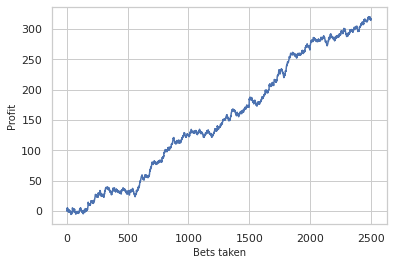

In 2505 bets we received a profit of €316.04, this boils down to an E(X) of 1.13


In [ ]:
y_pred_list = []
model.eval()
test_loss=0
test_acc=0
roi=0
profit=[]
bets_total=[]
percentage_lst=[]
bets=0
with torch.no_grad():
    for X_batch,y_batch,odds in test_loader:
        X_batch, y_batch,odds = X_batch.to(device), y_batch.to(device),odds.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        batch_profit,bets_taken,bets_return,percentage=get_roi(y_pred,odds,y_batch)
        percentage_lst.append(percentage.item())
        bets_total.extend(bets_return)
        roi+=batch_profit.item()
        bets+=bets_taken.item()
        profit.append(batch_profit.item())
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        test_loss += loss.item()
        test_acc += acc.item()
      
    print(f'Loss: {test_loss/len(test_loader):.5f} | Acc: {test_acc/len(test_loader):.3f}')
    graph_profit(bets_total)
    print("In {} bets we received a profit of €{}, this boils down to an E(X) of {}".format(bets,round(roi,2),round((bets+roi)/bets,2)))

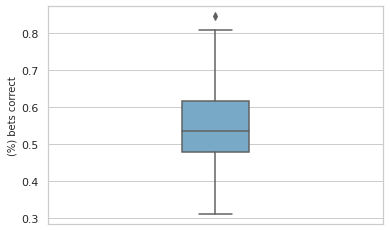

In [ ]:
  sns.set_theme(style="whitegrid")
  sns.boxplot(y=percentage_lst,palette="Blues", width=0.2)
  plt.ylabel("(%) bets correct", fontsize = 10)
  plt.savefig('boxplot_stake.png')
  plt.show()

Loss: 0.59553 | Acc: 68.370, Mean: 0.544642968022305


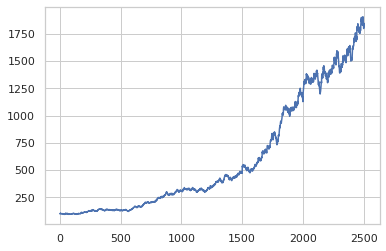

In 2505 bets we received a profit of €1828.37, this boils down to an E(X) of 1.73


In [ ]:
y_pred_list = []
model.eval()
test_loss=0
test_acc=0
roi=100
profit=[]
bets_total_model=[100]
percentage_lst=[]
bets=0
with torch.no_grad():
    for X_batch,y_batch,odds in test_loader:
        X_batch, y_batch,odds = X_batch.to(device), y_batch.to(device),odds.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        batch_profit,bets_taken,bets_return,percentage=get_roi(y_pred,odds,y_batch,stake=0.01*roi)
        percentage_lst.append(percentage.item())
        # if np.sum(bets_return)!=batch_profit:
        #   print(batch_profit)
        #   print(bets_return)
        #   sys.exit()
        bets_total_model.extend(bets_return)
        roi+=batch_profit.item()
        bets+=bets_taken.item()
        profit.append(batch_profit.item())
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        test_loss += loss.item()
        test_acc += acc.item()
      
    print(f'Loss: {test_loss/len(test_loader):.5f} | Acc: {test_acc/len(test_loader):.3f}, Mean: {np.mean(percentage_lst)}')
    graph_profit(bets_total_model)
    print("In {} bets we received a profit of €{}, this boils down to an E(X) of {}".format(bets,round(roi,2),round((bets+roi)/bets,2)))

In [ ]:
def get_roi_bet365(y_pred,odds,outcome,stake=1,threshold=1):
  bets_return=[]
  profit=0
  p1_odd,p2_odd=odds[:,0].unsqueeze(1),odds[:,1].unsqueeze(1)
  outcome=outcome.unsqueeze(1)
  bet_p1= (p2_odd > p1_odd) & (p1_odd>threshold)
  bet_p2= (p1_odd > p2_odd) & (p2_odd>threshold)
  bets_taken=torch.count_nonzero(bet_p1)+torch.count_nonzero(bet_p2)
  result=torch.sum(outcome[bet_p1].unsqueeze(1)*p1_odd[bet_p1].unsqueeze(1)*stake-stake)+torch.sum((1-outcome[bet_p2].unsqueeze(1))*p2_odd[bet_p2].unsqueeze(1)*stake-stake)
  [bets_return.append(round(i[0],4)) for i in ((outcome[bet_p1].unsqueeze(1)*p1_odd[bet_p1].unsqueeze(1)*stake-stake).tolist())]
  [bets_return.append(round(i[0],4)) for i in (((1-outcome[bet_p2].unsqueeze(1))*p2_odd[bet_p2].unsqueeze(1)*stake-stake).tolist())]
  percentage=(torch.sum(outcome[bet_p1].unsqueeze(1))+torch.sum((1-outcome[bet_p2].unsqueeze(1))))/(torch.sum(bet_p1)+torch.sum(bet_p2))
  return result,bets_taken,bets_return,percentage

Loss: 0.59553 | Acc: 68.370, Mean: 0.6602697874540868
2834


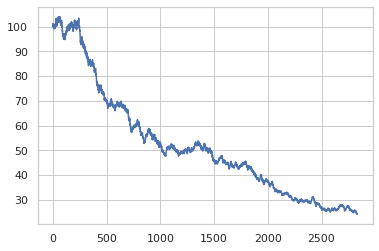

In 2833 bets we received a profit of €24.12, this boils down to an E(X) of 1.01


In [ ]:
y_pred_list = []
model.eval()
test_loss=0
test_acc=0
roi=100
profit=[]
bets_total_365=[100]
percentage_lst=[]
bets=0
with torch.no_grad():
    for X_batch,y_batch,odds in test_loader:
        X_batch, y_batch,odds = X_batch.to(device), y_batch.to(device),odds.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        batch_profit,bets_taken,bets_return,percentage=get_roi_bet365(y_pred,odds,y_batch,stake=0.01*roi)
        bets_total_365.extend(bets_return)
        percentage_lst.append(percentage.item())
        roi+=batch_profit.item()
        # if roi<0:
        #   break
        bets+=bets_taken.item()
        profit.append(batch_profit.item())
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        test_loss += loss.item()
        test_acc += acc.item()

    print(f'Loss: {test_loss/len(test_loader):.5f} | Acc: {test_acc/len(test_loader):.3f}, Mean: {np.mean(percentage_lst)}')
    print(len(bets_total_365))
    graph_profit(bets_total_365)
    print("In {} bets we received a profit of €{}, this boils down to an E(X) of {}".format(bets,round(roi,2),round((bets+roi)/bets,2)))

In [ ]:
def graph_profit_compare(profit_model,profit_linear_stake,profit_bet365):
    sns.lineplot(data=np.cumsum(profit_model))
    sns.lineplot(data=np.cumsum(profit_linear_stake))
    sns.lineplot(data=np.cumsum(profit_bet365))
    plt.legend(labels=["Exponential Stake NN","Linear Stake NN",'Exponetial Stake Bet365'])
    plt.xlabel("Bets taken", fontsize = 10)
    plt.ylabel("Profit", fontsize = 10)
    plt.savefig('outcome.png')

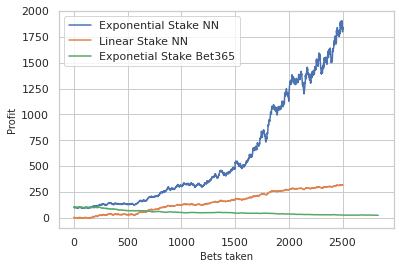

In [ ]:
graph_profit_compare(bets_total_model,bets_total,bets_total_365)